In [1]:
import cooler
import pandas as pd
import numpy as np

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import itertools

In [79]:
import bioframe

In [81]:
from bioframe.io import resources

In [270]:
c = cooler.Cooler("rao204.2mb.cool")
hh = c.matrix(balance=False,as_pixels=True,sparse=True)

In [271]:
ff = resources.fetch_gaps("hg19")

In [272]:
cents = ff[ff["type"]=="centromere"].set_index("chrom").reindex(c.chromnames[:-3])
splt = (0.5*(cents["start"]+cents["end"])).astype(int)
arms = bioframe.tools.split_chromosomes(c.chromsizes,splt)
# arms

In [273]:
# arms = bioframe.tools.split_chromosomes(c.chromsizes,splt)

Text(0.5,1,'cis, inter-arm level - kinda trans')

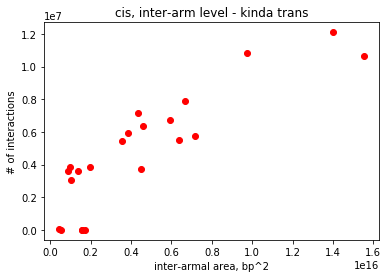

In [274]:
# cis but inter-arm

grp = arms.groupby("chrom")

x = []
y = []
for g in grp.groups:
    # print(_c0,_s,_e)
    _c1,_s1,_e1,_ = grp.get_group(g).iloc[0]
    _c2,_s2,_e2,_ = grp.get_group(g).iloc[1]
    _size1 = _e1-_s1
    _size2 = _e2-_s2
    #     if _size > 4_000_000:
    _x = float(_size1)*float(_size2)
    _y = hh.fetch((_c1,_s1,_e1),(_c2,_s2,_e2))["count"].sum()
    x.append(_x)
    y.append(_y)
    
    
plt.plot(x,y,"ro")
plt.gca().set_xlabel("inter-armal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis, inter-arm level - kinda trans")

Text(0.5,1,'cis, chromosome-arm level')

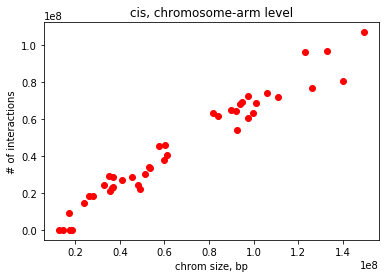

In [275]:
# cis - by-arm ...

x = []
y = []
for _c0,_s,_e in arms[["chrom","start","end"]].itertuples(index=False):
    # print(_c0,_s,_e)
    # if _size > 4_000_000:
    _size = _e-_s
    _x = float(_size)
    _y = hh.fetch((_c0,_s,_e))["count"].sum()
    x.append(_x)
    y.append(_y)
        
plt.plot(x,y,"ro")
plt.gca().set_xlabel("chrom size, bp")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis, chromosome-arm level")

Text(0.5,1,'trans, chromosome-arm level, 924 points')

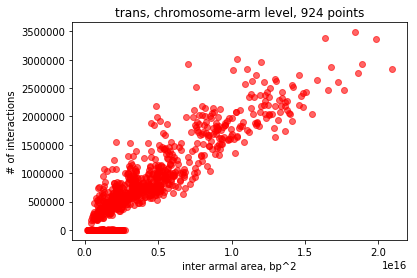

In [276]:
# inter chromosomal - by-arm ... - whatever ...

x = []
y = []
N = 0
for _tup1,_tup2 in itertools.combinations(arms[["chrom","start","end"]].itertuples(index=False),2):
    _c1,_s1,_e1 = _tup1
    _c2,_s2,_e2 = _tup2
    _size1 = _e1-_s1
    _size2 = _e2-_s2
    if ( _c1 != _c2 ) and ( min(_size1,_size2)>3_000_000 ):
        _x = float(_size1)*float(_size2)
        _y = hh.fetch((_c1,_s1,_e1),(_c2,_s2,_e2))["count"].sum()
        x.append(_x)
        y.append(_y)
        N += 1
        
plt.plot(x,y,"ro",alpha=0.6)
plt.gca().set_xlabel("inter armal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title(f"trans, chromosome-arm level, {N} points")

Text(0.5,1,'trans interactions, chromosome level')

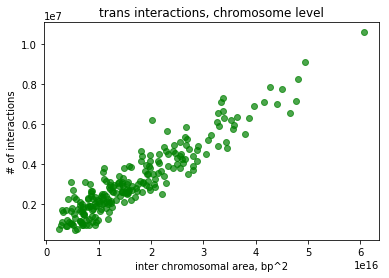

In [277]:
# trans interactions (whole chromosome ...)

x = []
y = []
for _c0,_c2 in itertools.combinations(c.chromnames[:-3],2):
    _x = float(c.chromsizes[_c0])*c.chromsizes[_c2]
    _y = hh.fetch(_c0,_c2)["count"].sum()
    x.append(_x)
    y.append(_y)
    
plt.plot(x,y,"go",alpha=0.7)
plt.gca().set_xlabel("inter chromosomal area, bp^2")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("trans interactions, chromosome level")

Text(0.5,1,'cis interactions, chromosome level')

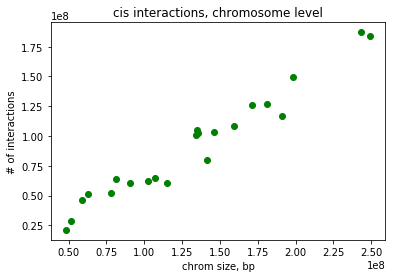

In [278]:
# cis interactions - whole chromosome ...

x = []
y = []
for chrom in c.chromnames[:-3]:
    _x = c.chromsizes[chrom]
    _y = hh.fetch(chrom)["count"].sum()
    x.append(_x)
    y.append(_y)
    
plt.plot(x,y,"go")
plt.gca().set_xlabel("chrom size, bp")
plt.gca().set_ylabel("# of interactions")
plt.gca().set_title("cis interactions, chromosome level")